# Imporing Required Packages

In [48]:
import pandas as pd
import numpy as np

from pandas.plotting import scatter_matrix # for ploting corr()

from sklearn.model_selection import StratifiedShuffleSplit # for train_test_split

from sklearn.pipeline import Pipeline  # for data transformation
from sklearn.preprocessing import StandardScaler   # for standardization of data
from sklearn.impute import SimpleImputer  # for filling missing values

# models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error # for calculating error

from sklearn.model_selection import cross_val_score  #for cross validating using sampling

# Loading Data

In [2]:
filename = "files/housing_data.csv"
data = pd.read_csv(filename)

# Looking for General Insights of data

In [3]:
data.head  # looking all the datapoints

<bound method NDFrame.head of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX   
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296  \
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90 

In [4]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


<h3> SO THIS DATA has 505 DATAPOINTS/INSTANCE AND 14 FEATURES </h3>

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       500 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,500.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.283550,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.704848,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884750,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.626000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
data["CHAS"].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

In [8]:
data["MEDV"].value_counts()

MEDV
50.0    16
25.0     8
22.0     7
21.7     7
23.1     7
        ..
32.9     1
34.6     1
30.3     1
33.3     1
8.1      1
Name: count, Length: 229, dtype: int64

<h3>all the features has 506 datapoints but "RM" has missing some datapoints only 500 datapoints exits, "CHAS" is catagotic with 471 0 valuesa and 35 1 values</h3>

<h2> LOOKING FOR CORELATION WITH PRICE:- "MEDV"</h2>

In [9]:
data.corr()["MEDV"].sort_values(ascending= False)

MEDV       1.000000
RM         0.694461
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

<h3>these feature has more impact on price "MEDV":- RM, ZN, INDUS, PTRATIO, LSTAT</h3>

# Ploting Data

array([[<Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='INDUS', ylabel='RM'>,
        <Axes: xlabel='PTRATIO', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>,
        <Axes: xlabel='MEDV', ylabel='RM'>],
       [<Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='INDUS', ylabel='ZN'>,
        <Axes: xlabel='PTRATIO', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>,
        <Axes: xlabel='MEDV', ylabel='ZN'>],
       [<Axes: xlabel='RM', ylabel='INDUS'>,
        <Axes: xlabel='ZN', ylabel='INDUS'>,
        <Axes: xlabel='INDUS', ylabel='INDUS'>,
        <Axes: xlabel='PTRATIO', ylabel='INDUS'>,
        <Axes: xlabel='LSTAT', ylabel='INDUS'>,
        <Axes: xlabel='MEDV', ylabel='INDUS'>],
       [<Axes: xlabel='RM', ylabel='PTRATIO'>,
        <Axes: xlabel='ZN', ylabel='PTRATIO'>,
        <Axes: xlabel='INDUS', ylabel='PTRATIO'>,
        <Axes: xlabel='PTRATIO', ylabel=

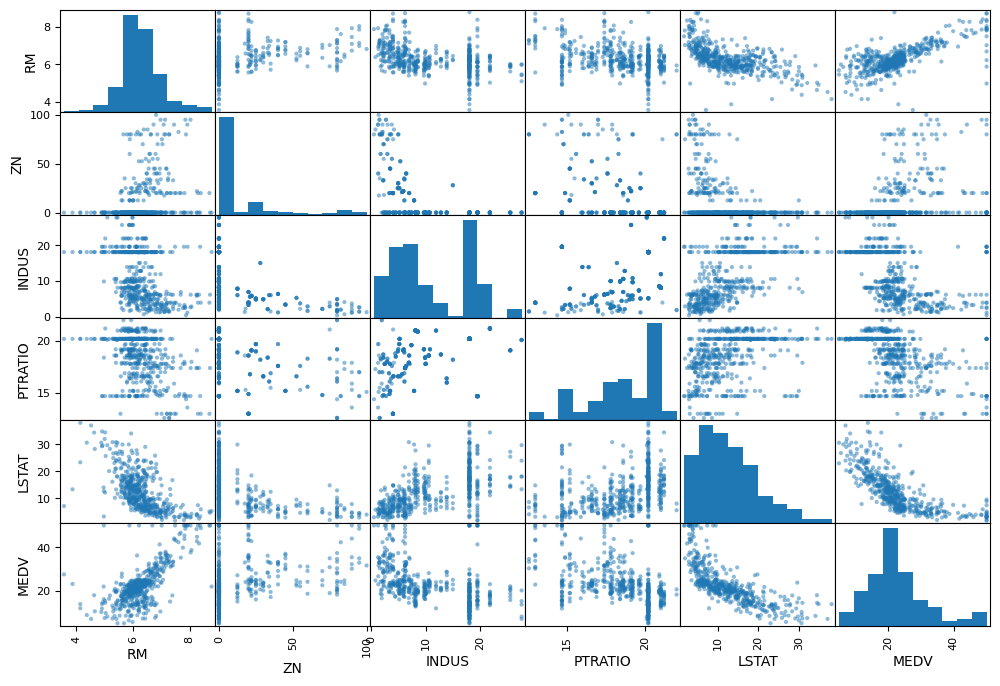

In [10]:
attributes = ["RM", "ZN", "INDUS", "PTRATIO", 'LSTAT', "MEDV"]
scatter_matrix(data[attributes], figsize= (12,8))

<h3> here clear trend of RM and LSTAT with MEDV </h3>

<Axes: xlabel='RM', ylabel='MEDV'>

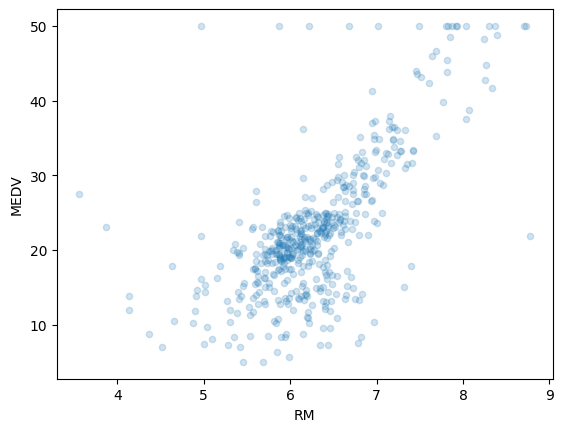

In [11]:
data.plot(kind= "scatter", x= "RM", y= "MEDV", alpha= 0.2)

* there are multiple outliar due to cap on MEDV to 50 

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

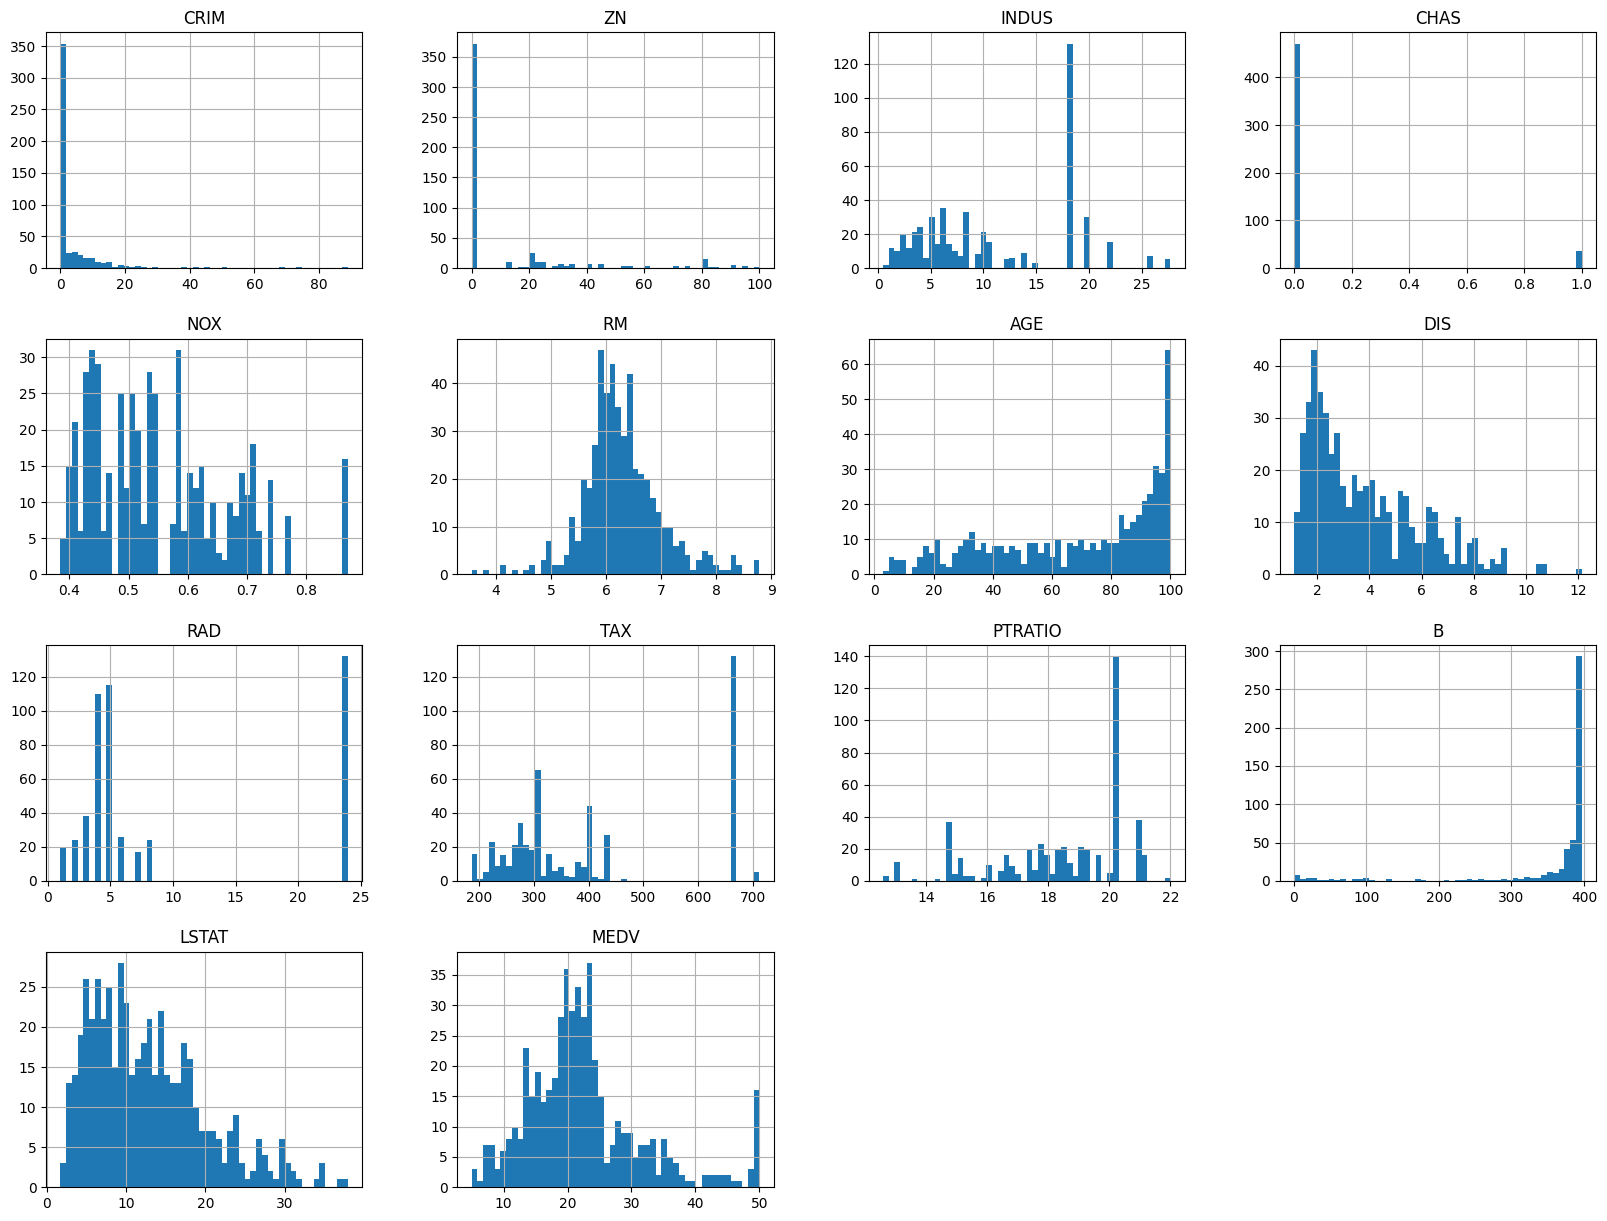

In [12]:
data.hist(bins=50, figsize= (20,15))  #to see distribution of each feature

# Train_Test_spliting

In [13]:
#spliting train and test set such that it split categorical data "CHAS" uniformally, so it represent population

split = StratifiedShuffleSplit(n_splits= 1, test_size= 0.2, random_state= 42)
for train_index, test_index in split.split(data, data["CHAS"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [14]:
strat_train_set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,88.01,15.02,15.6
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,13.4
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,43.8
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13,14.1


In [15]:
strat_test_set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
342,0.02498,0.0,1.89,0,0.518,6.540,59.7,6.2669,1,422,15.9,389.96,8.65,16.5
379,17.86670,0.0,18.10,0,0.671,6.223,100.0,1.3861,24,666,20.2,393.74,21.78,10.2
223,0.61470,0.0,6.20,0,0.507,6.618,80.8,3.2721,8,307,17.4,396.90,7.60,30.1
219,0.11425,0.0,13.89,1,0.550,6.373,92.4,3.3633,5,276,16.4,393.74,10.50,23.0
48,0.25387,0.0,6.91,0,0.448,5.399,95.3,5.8700,3,233,17.9,396.90,30.81,14.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.05660,0.0,3.41,0,0.489,7.007,86.3,3.4217,2,270,17.8,396.90,5.50,23.6
466,3.77498,0.0,18.10,0,0.655,5.952,84.7,2.8715,24,666,20.2,22.01,17.15,19.0
52,0.05360,21.0,5.64,0,0.439,6.511,21.1,6.8147,4,243,16.8,396.90,5.28,25.0
121,0.07165,0.0,25.65,0,0.581,6.004,84.1,2.1974,2,188,19.1,377.67,14.27,20.3


In [16]:
# validating "CHAS" distribution over train and test set
strat_test_set["CHAS"].value_counts()

CHAS
0    95
1     7
Name: count, dtype: int64

In [17]:
95/7

13.571428571428571

In [18]:
strat_train_set["CHAS"].value_counts()

CHAS
0    376
1     28
Name: count, dtype: int64

In [19]:
378/28

13.5

In [20]:
housing_train_features = strat_train_set.drop("MEDV", axis= 1)
housing_train_labels = strat_train_set["MEDV"]
housing_test_features = strat_test_set.drop("MEDV", axis= 1)
housing_test_labels = strat_test_set["MEDV"]

In [21]:
housing_test_features

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
342,0.02498,0.0,1.89,0,0.518,6.540,59.7,6.2669,1,422,15.9,389.96,8.65
379,17.86670,0.0,18.10,0,0.671,6.223,100.0,1.3861,24,666,20.2,393.74,21.78
223,0.61470,0.0,6.20,0,0.507,6.618,80.8,3.2721,8,307,17.4,396.90,7.60
219,0.11425,0.0,13.89,1,0.550,6.373,92.4,3.3633,5,276,16.4,393.74,10.50
48,0.25387,0.0,6.91,0,0.448,5.399,95.3,5.8700,3,233,17.9,396.90,30.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.05660,0.0,3.41,0,0.489,7.007,86.3,3.4217,2,270,17.8,396.90,5.50
466,3.77498,0.0,18.10,0,0.655,5.952,84.7,2.8715,24,666,20.2,22.01,17.15
52,0.05360,21.0,5.64,0,0.439,6.511,21.1,6.8147,4,243,16.8,396.90,5.28
121,0.07165,0.0,25.65,0,0.581,6.004,84.1,2.1974,2,188,19.1,377.67,14.27


In [22]:
housing_test_labels

342    16.5
379    10.2
223    30.1
219    23.0
48     14.4
       ... 
88     23.6
466    19.0
52     25.0
121    20.3
218    21.5
Name: MEDV, Length: 102, dtype: float64

In [23]:
housing_train_features

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,88.01,15.02
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13


In [24]:
housing_train_labels

254    21.9
348    24.5
476    16.7
321    23.1
326    23.0
       ... 
155    15.6
423    13.4
98     43.8
455    14.1
216    23.3
Name: MEDV, Length: 404, dtype: float64

# Building Pipeline for Data transformation

In [25]:
# building pipeline for data transformation like- imputing, standa=ardization
my_pipeline= Pipeline([
    ("imputer", SimpleImputer(strategy= "median")),
    ("std_scaler", StandardScaler()),
    
    # ...multiple data transformation strategy..
    
    
])

housing_train_tr_features = my_pipeline.fit_transform(housing_train_features)
housing_test_tr_features = my_pipeline.fit_transform(housing_test_features)

In [26]:
housing_train_tr_features

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

In [27]:
housing_train_tr_features.shape

(404, 13)

In [28]:
housing_train_tr_features[0,:]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.23877085, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

In [29]:
housing_test_tr_features

array([[-0.35082247, -0.49148409, -1.25183452, ..., -1.08091535,
         0.2995192 , -0.51357301],
       [ 1.37303938, -0.49148409,  1.15752471, ...,  0.78926008,
         0.35531976,  1.43854081],
       [-0.2938439 , -0.49148409, -0.61122142, ..., -0.42852857,
         0.40196786, -0.66968264],
       ...,
       [-0.34805722,  0.27583291, -0.69445654, ..., -0.68948328,
         0.40196786, -1.0146106 ],
       [-0.34631323, -0.49148409,  2.27971238, ...,  0.31084311,
         0.11809354,  0.32198523],
       [-0.3425412 , -0.49148409,  0.53177502, ..., -0.86345309,
         0.40196786,  0.86465206]])

In [30]:
housing_test_tr_features.shape

(102, 13)

In [31]:
housing_test_tr_features[0:5,:]

array([[-0.35082247, -0.49148409, -1.25183452, -0.27144836, -0.21067276,
         0.35869844, -0.25450164,  1.07434355, -0.91150503,  0.17974455,
        -1.08091535,  0.2995192 , -0.51357301],
       [ 1.37303938, -0.49148409,  1.15752471, -0.27144836,  1.16957874,
        -0.12179519,  1.20375658, -1.22708003,  1.7715449 ,  1.64071199,
         0.78926008,  0.35531976,  1.43854081],
       [-0.2938439 , -0.49148409, -0.61122142, -0.27144836, -0.30990653,
         0.47692715,  0.50900328, -0.3377822 , -0.09492461, -0.50882617,
        -0.42852857,  0.40196786, -0.66968264],
       [-0.34219723, -0.49148409,  0.53177502,  3.68394199,  0.07800729,
         0.10556772,  0.92875007, -0.29477903, -0.44488765, -0.69444089,
        -0.86345309,  0.35531976, -0.2385227 ],
       [-0.32870719, -0.49148409, -0.50569119, -0.27144836, -0.84216037,
        -1.37077548,  1.03368676,  0.88719492, -0.67819634, -0.95190646,
        -0.21106631,  0.40196786,  2.78108368]])

# parameter for model

* traing features- housing_train_tr_features
* traing labels- housing_train_labels

* test features- housing_test_tr_features
* test labels- housing_test_labels

# Training Model

In [32]:
#selecting the model
model = LinearRegression()

In [33]:
#taining model
model.fit(housing_train_tr_features, housing_train_labels)

LinearRegression()

In [34]:
# pridictiong some exiting datapoints for idea about error
some_data = housing_train_features.iloc[:5]
some_data_tr  = my_pipeline.transform(some_data)
some_data_tr

array([[-0.34857993,  2.43162828, -0.99172479, -0.27144836, -1.34735047,
        -0.29610676, -1.25682801,  2.46694812, -0.91150503, -0.4609256 ,
        -0.86345309,  0.34277202, -0.82281876],
       [-0.35178577,  2.43162828, -1.23399842, -0.27144836, -0.95943665,
         0.50269495, -1.34005367,  2.05374998, -0.56154199, -0.6704906 ,
        -0.60249838,  0.31398601, -0.90905075],
       [ 0.1174382 , -0.49148409,  1.15752471, -0.27144836,  0.6553674 ,
         0.27381628,  0.97217215, -0.79365343,  1.7715449 ,  1.64071199,
         0.78926008,  0.39178204,  0.9776457 ],
       [-0.33569086, -0.49148409, -0.43583315, -0.27144836, -0.43620405,
         0.11011498, -0.44990101,  0.26025409, -0.44488765, -0.6285776 ,
         0.52830537,  0.40196786, -0.77821601],
       [-0.32391485, -0.49148409, -0.43583315, -0.27144836, -0.43620405,
         0.0131068 , -1.36900172,  0.67307501, -0.44488765, -0.6285776 ,
         0.52830537,  0.40196786, -0.88526261]])

In [35]:
housing_train_tr_features    # for confirmation that it will be not identical as some_data bcz it calted on 505 pionts 

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

In [36]:
list(model.predict(some_data_tr))

[23.145288644380784,
 26.591386337593512,
 19.92247820985213,
 24.862995637298212,
 23.597990588192005]

In [37]:
housing_train_labels[:5]

254    21.9
348    24.5
476    16.7
321    23.1
326    23.0
Name: MEDV, dtype: float64

<h6> predicting quite accurate  </h6>

In [38]:
# getting prediction for all the training feature
housing_prediction = model.predict(housing_train_tr_features)
housing_prediction

array([24.12185552, 27.39875812, 20.54267307, 25.04047489, 23.75193944,
       16.72596161, 24.18760255, 24.72256479, 12.49188558, 33.05155491,
       12.59640417, 20.49332874,  3.65773814, 29.88705737, 20.33658616,
       15.10646563, 20.84063675, 17.34521879, 12.33207289, 20.24900623,
       18.69898727, 13.41070453, 17.44369889, 14.86017374, 27.21171297,
       29.0587976 , 12.11391088, 23.54298677, 15.19587692, 32.42044819,
       13.33427019, 18.78068308, 13.41663894, 20.23183702, 15.6274615 ,
       24.61380408, 23.98948698, 40.77192894, 33.56138058, 20.28703302,
       24.82042138, 33.87505253, 34.190192  ,  7.01059235, 16.60236412,
        5.72156796, 24.76008956, 29.09520668, 24.24016307, -3.73706649,
       26.67494598, 24.64156705, 25.83355132, 31.02887234, 14.21071496,
       34.09714667, 20.45877055, 27.72331219, 30.39881554, 18.41950752,
       19.9733661 , 18.95067934, 28.74871059, 23.06242323, 11.49092359,
       32.62609893, 38.03474084, 13.77420349, 27.97546239, 34.41

In [39]:
housing_prediction.shape

(404,)

In [40]:
x = housing_prediction.reshape(-1,1)
x

array([[24.12185552],
       [27.39875812],
       [20.54267307],
       [25.04047489],
       [23.75193944],
       [16.72596161],
       [24.18760255],
       [24.72256479],
       [12.49188558],
       [33.05155491],
       [12.59640417],
       [20.49332874],
       [ 3.65773814],
       [29.88705737],
       [20.33658616],
       [15.10646563],
       [20.84063675],
       [17.34521879],
       [12.33207289],
       [20.24900623],
       [18.69898727],
       [13.41070453],
       [17.44369889],
       [14.86017374],
       [27.21171297],
       [29.0587976 ],
       [12.11391088],
       [23.54298677],
       [15.19587692],
       [32.42044819],
       [13.33427019],
       [18.78068308],
       [13.41663894],
       [20.23183702],
       [15.6274615 ],
       [24.61380408],
       [23.98948698],
       [40.77192894],
       [33.56138058],
       [20.28703302],
       [24.82042138],
       [33.87505253],
       [34.190192  ],
       [ 7.01059235],
       [16.60236412],
       [ 5

In [41]:
x.shape

(404, 1)

# Determining Accuracy

In [44]:
lin_mse= mean_squared_error(housing_train_labels, housing_prediction)
lin_mse

23.45897252173812

In [47]:
lin_rmse= np.sqrt(lin_mse)
lin_rmse

4.843446347564729

<h4>RMSE for LinearRegressor Model=  4.843446347564729</h4>

In [49]:
# trying another model
model1= DecisionTreeRegressor()
model1.fit(housing_train_tr_features, housing_train_labels)

DecisionTreeRegressor()

In [50]:
dtr_predictions= model1.predict(housing_train_tr_features)
dtr_predictions

array([21.9, 24.5, 16.7, 23.1, 23. , 17.2, 24.4, 27.5,  9.5, 31.6, 16.3,
       18.3,  8.1, 34.9, 24.5, 13.4, 18.7, 19.1,  5.6, 20.5, 19.6, 17.2,
       17.4, 27.5, 23.9, 25. , 12.7, 21.2, 14.8, 29. , 14. , 16.6, 11.3,
       13.3, 21.9, 29.6, 23.4, 50. , 31.7, 20.4, 21.4, 34.9, 37.9, 10.4,
       20.1, 13.8, 21.7, 25. , 22.2,  7. , 24.8, 22.8, 23.8, 28.7, 14.3,
       41.3, 21.7, 23.9, 32.9, 16.1, 19.5, 19.9, 28.4, 21. , 13.8, 31.6,
       50. , 14.5, 26.6, 35.4, 22. , 36.5, 22.4, 10.5, 20.1, 29.8, 24. ,
       15.2, 16.1, 18.5, 29.6,  7.5, 19.3, 18.7, 24.8, 27.5, 30.5, 25.3,
       29.8, 17.9, 22.9, 30.1, 27.9, 20.4, 21.7, 33.4, 21.9, 19. , 22. ,
       19.1, 13.9, 45.4, 20.3, 42.3, 16. , 15.6, 20.5, 22.7, 29.1, 17.8,
       15. ,  7.2, 15.1, 20.6, 11.8, 19.1, 13.1, 37.2, 23.3, 15.2, 23.1,
        8.5,  8.3, 19.3, 24.1, 14.6, 14.1, 25. , 11.7, 21.2, 22.9, 11.8,
       16.8, 11.9, 50. , 17.1, 23.7, 23.9, 22.5, 50. , 14.9, 22.6, 28.6,
       18.8, 32.7, 17.6, 21. , 18.5, 19.9,  8.8, 24

In [51]:
housing_train_labels

254    21.9
348    24.5
476    16.7
321    23.1
326    23.0
       ... 
155    15.6
423    13.4
98     43.8
455    14.1
216    23.3
Name: MEDV, Length: 404, dtype: float64

In [68]:
dtr_rmse= np.sqrt(mean_squared_error(housing_train_labels, dtr_predictions))
dtr_rmse

0.0

In [52]:
# it's looks like this model has been over fited on data varifing it using CROSS VALIDATION

<h2>Cross Validation</h2>

In [58]:
scores = cross_val_score(model1, housing_train_tr_features, housing_train_labels, scoring= "neg_mean_squared_error", cv= 10)
scores

array([-17.39536585, -28.69512195, -28.88634146, -17.4295122 ,
       -14.301     , -15.881     , -51.28425   , -16.60775   ,
       -11.34925   , -16.454     ])

In [61]:
dtr_rmse= np.sqrt(-scores)
dtr_rmse

array([4.17077521, 5.3567828 , 5.37460152, 4.17486673, 3.7816663 ,
       3.98509724, 7.16130226, 4.07526073, 3.36886479, 4.05635304])

In [63]:
dtr_rmse.mean()

4.550557061066638

<h4>Error of DecisionTreeRegressor is 4.550557061066638</h4>

In [67]:
model2 = RandomForestRegressor()
model2.fit(housing_train_tr_features, housing_train_labels)

RandomForestRegressor()

In [69]:
rfr_predictiions= model2.predict(housing_train_tr_features)
rfr_predictiions

array([22.32 , 25.514, 16.316, 23.345, 23.428, 16.749, 24.505, 26.204,
       10.391, 31.915, 15.491, 18.593,  9.903, 34.185, 22.662, 13.728,
       19.182, 18.343,  6.729, 20.451, 19.   , 16.763, 18.104, 26.706,
       24.24 , 24.9  , 13.514, 21.136, 14.906, 27.741, 14.549, 18.429,
       11.568, 13.352, 20.748, 27.703, 23.51 , 46.638, 32.936, 20.216,
       22.01 , 35.061, 37.062,  9.811, 20.358, 12.54 , 21.516, 26.932,
       22.816,  8.37 , 24.622, 23.22 , 23.645, 30.815, 14.939, 37.614,
       21.379, 25.295, 34.023, 17.396, 20.062, 20.155, 27.461, 20.938,
       14.105, 31.806, 49.806, 14.712, 26.387, 35.165, 22.895, 35.734,
       22.999, 10.145, 20.683, 27.364, 25.395, 14.625, 16.218, 18.709,
       31.346,  8.419, 19.224, 18.801, 26.387, 22.876, 30.235, 24.959,
       29.502, 16.328, 23.095, 30.702, 27.818, 20.058, 21.744, 34.111,
       28.548, 19.677, 23.136, 17.327, 12.714, 46.398, 20.41 , 43.524,
       17.295, 15.89 , 19.424, 21.498, 27.29 , 16.71 , 17.314,  7.813,
      

In [71]:
rfr_rmse= np.sqrt(mean_squared_error(housing_train_labels, rfr_predictiions))
rfr_rmse

1.2549663460439755

*<H3>RandomForestregressor performin way better then linearRegresssor, DesionTreeRegressor with erorr only 1.2549663460439755
</H3>*

# Testing Model
* winner model= RandomForestRegressor() = model2

In [73]:
rfr_test_set_predictions= model2.predict(housing_test_tr_features)
rfr_test_set_predictions

array([23.921, 10.03 , 25.79 , 21.521, 17.116, 14.501, 19.895, 14.715,
       31.715, 41.38 , 18.903,  9.301, 23.336, 31.521, 20.585, 12.64 ,
       32.461, 15.011, 23.363, 17.405, 19.355, 15.278, 18.547, 21.409,
       18.64 , 31.396, 16.421, 32.572,  9.541, 33.858, 24.862, 21.031,
       23.312,  8.986, 20.351, 12.471, 41.826, 23.284, 23.773, 43.895,
       23.501, 27.927, 20.515, 21.763, 15.544, 32.885, 44.141, 21.025,
       17.905, 22.678, 21.383, 14.738, 19.625, 14.507, 24.217, 33.871,
       41.948, 28.14 , 18.108, 20.789, 47.655, 10.914, 18.771, 23.323,
       14.175, 38.006, 20.049, 16.624, 17.676, 34.628, 24.964, 23.061,
       19.865, 22.453, 35.918, 12.792, 15.634, 20.503, 21.337, 21.458,
       22.317, 21.708, 13.726, 23.477, 20.852, 21.305, 14.169, 21.026,
       22.018, 23.111, 17.503, 26.091,  8.471, 24.518, 15.686, 29.917,
       20.23 , 31.596, 13.667, 25.883, 17.855, 17.434])

In [74]:
rfr_test_set_rmse= np.sqrt(mean_squared_error(housing_test_labels, rfr_test_set_predictions))
rfr_test_set_rmse

3.3996118809617752

<h4>RendomForestRegressor RMSE on test set= 3.3996118809617752 better then both LR, DTR</h4>

* # Joblib Dumping and Loading of Model 

In [75]:
from joblib import dump, load

In [76]:
dump(model2, "price_predictor.joblib")

['price_predictor.joblib']